# **Week5**
# **Convolutional Neural Network**

![cnn](http://parse.ele.tue.nl/cluster/2/CNNArchitecture.jpg)

### Repeat lab video
#### Simple Convolution Layer

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


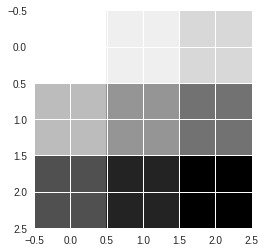

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


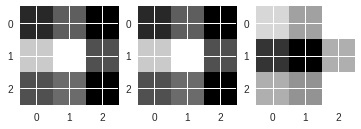

In [3]:
# # print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

#### Max Pooling

In [4]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


### Remember
image.shape = [# of image, n, n, color]

weight.shape = [n, n, color, # of filter]

stride = [1, n, n, 1]

ksize = [1, n, n, 1]

original image: nXn, 
stride: 2X2, 
padding='SAME'
=> output: (n/2) X (n/2)

# CNN MNIST: 99%

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
keep_prob = tf.placeholder(tf.float32)

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

In [0]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

In [0]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [0]:
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], 
                    strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

In [0]:
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [0]:
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.390806842
Epoch: 0002 cost = 0.093335660
Epoch: 0003 cost = 0.070024019
Epoch: 0004 cost = 0.055735740
Epoch: 0005 cost = 0.052725835
Epoch: 0006 cost = 0.045113899
Epoch: 0007 cost = 0.042455362
Epoch: 0008 cost = 0.039459311
Epoch: 0009 cost = 0.036316336
Epoch: 0010 cost = 0.033372368
Epoch: 0011 cost = 0.031189243
Epoch: 0012 cost = 0.031500518
Epoch: 0013 cost = 0.026956368
Epoch: 0014 cost = 0.029344459
Epoch: 0015 cost = 0.026344775
Learning Finished!


In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Accuracy: 0.993


# Python Class

In [0]:
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and # Pooling Layer #1
            weight1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            layer1 = tf.nn.conv2d(X_img, weight1, strides=[1, 1, 1, 1], padding='SAME')
            layer1 = tf.nn.relu(layer1)
            layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer1 = tf.nn.dropout(layer1, keep_prob=0.7)

            # Convolutional Layer #2 and Pooling Layer #2
            weight2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            layer2 = tf.nn.conv2d(layer1, weight2, strides=[1, 1, 1, 1], padding='SAME')
            layer2 = tf.nn.relu(layer2)
            layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer2 = tf.nn.dropout(layer2, keep_prob=0.7)
            
            # Convolutional Layer #3 and Pooling Layer #3
            weight3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            layer3 = tf.nn.conv2d(layer2, weight3, strides=[1, 1, 1, 1], padding='SAME')
            layer3 = tf.nn.relu(layer3)
            layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer3 = tf.nn.dropout(layer3, keep_prob=0.7)

            # Dense Layer with Relu
            flat = tf.reshape(layer3, [-1, 128 * 4 * 4])
            weight4 = tf.get_variable("weight4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias4 = tf.Variable(tf.random_normal([625]))
            layer4 = tf.nn.relu(tf.matmul(flat, weight4) + bias4)
            layer4 = tf.nn.dropout(layer4, keep_prob=0.7)
            
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            weight5 = tf.get_variable("weight5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(layer4, weight5) + bias5
            
        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

# Ensemble

In [18]:
sess = tf.Session()

models = []
num_models = 2
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

Learning Started!


In [19]:
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Epoch: 0001 cost = [0.39676373 0.4084054 ]
Epoch: 0002 cost = [0.08873104 0.09510502]
Epoch: 0003 cost = [0.06583031 0.07203107]
Epoch: 0004 cost = [0.05476968 0.05950908]
Epoch: 0005 cost = [0.04954448 0.05296117]
Epoch: 0006 cost = [0.04311784 0.04720076]
Epoch: 0007 cost = [0.03801339 0.042494  ]
Epoch: 0008 cost = [0.03488961 0.03926779]
Epoch: 0009 cost = [0.03517963 0.03764357]
Epoch: 0010 cost = [0.03135888 0.03439149]
Epoch: 0011 cost = [0.02783976 0.03200202]
Epoch: 0012 cost = [0.02782426 0.0295955 ]
Epoch: 0013 cost = [0.02596771 0.02925884]
Epoch: 0014 cost = [0.02572112 0.02772851]
Epoch: 0015 cost = [0.02466742 0.02716377]
Learning Finished!


In [20]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9889
1 Accuracy: 0.9875
Ensemble accuracy: 0.992


## Does 'tf.layers' make negative effect?

In [0]:
class Model_TF:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=8, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=16, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.7, training=self.training)
                        
            # Dense Layer #1 with Relu
            flat = tf.reshape(dropout3, [-1, 32 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu,
                                    kernel_initializer=tf.contrib.layers.xavier_initializer())
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.7, training=self.training)
                                    
            # Logits (no activation) Layer
            self.logits = tf.layers.dense(inputs=dropout4, units=10,
                                         kernel_initializer=tf.contrib.layers.xavier_initializer())

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [22]:
sess = tf.Session()

models_tf = []
num_models = 2
for m in range(num_models):
    models_tf.append(Model_TF(sess, "model_tf" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models_tf))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models_tf):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [1.58819899 1.72660743]
Epoch: 0002 cost = [0.86550026 1.08872738]
Epoch: 0003 cost = [0.73485713 0.89989919]
Epoch: 0004 cost = [0.68126709 0.8060744 ]
Epoch: 0005 cost = [0.64323365 0.74894865]
Epoch: 0006 cost = [0.62050983 0.70693656]
Epoch: 0007 cost = [0.59783467 0.67399316]
Epoch: 0008 cost = [0.58686635 0.65314546]
Epoch: 0009 cost = [0.57381208 0.63338927]
Epoch: 0010 cost = [0.56233586 0.6198501 ]
Epoch: 0011 cost = [0.55054288 0.60961522]
Epoch: 0012 cost = [0.54562063 0.5964616 ]
Epoch: 0013 cost = [0.53787615 0.58378026]
Epoch: 0014 cost = [0.52385646 0.57304176]
Epoch: 0015 cost = [0.51980004 0.56616407]
Learning Finished!


In [23]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models_tf):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.8875
1 Accuracy: 0.9299
Ensemble accuracy: 0.9475


# How can we make it better?
## 1. More filters

In [0]:
class Model_F:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and # Pooling Layer #1
            weight1 = tf.Variable(tf.random_normal([3, 3, 1, 64], stddev=0.01))
            layer1 = tf.nn.conv2d(X_img, weight1, strides=[1, 1, 1, 1], padding='SAME')
            layer1 = tf.nn.relu(layer1)
            layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer1 = tf.nn.dropout(layer1, keep_prob=0.7)

            # Convolutional Layer #2 and Pooling Layer #2
            weight2 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            layer2 = tf.nn.conv2d(layer1, weight2, strides=[1, 1, 1, 1], padding='SAME')
            layer2 = tf.nn.relu(layer2)
            layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer2 = tf.nn.dropout(layer2, keep_prob=0.7)
            
            # Convolutional Layer #3 and Pooling Layer #3
            weight3 = tf.Variable(tf.random_normal([3, 3, 128, 256], stddev=0.01))
            layer3 = tf.nn.conv2d(layer2, weight3, strides=[1, 1, 1, 1], padding='SAME')
            layer3 = tf.nn.relu(layer3)
            layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer3 = tf.nn.dropout(layer3, keep_prob=0.7)

            # Dense Layer with Relu
            flat = tf.reshape(layer3, [-1, 256 * 4 * 4])
            weight4 = tf.get_variable("weight4", shape=[256 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias4 = tf.Variable(tf.random_normal([625]))
            layer4 = tf.nn.relu(tf.matmul(flat, weight4) + bias4)
            layer4 = tf.nn.dropout(layer4, keep_prob=0.7)
            
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            weight5 = tf.get_variable("weight5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(layer4, weight5) + bias5
            
        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [25]:
sess = tf.Session()

models_f = []
num_models = 2
for m in range(num_models):
    models_f.append(Model_F(sess, "model_f" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models_f))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models_f):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [0.32544126 0.29786262]
Epoch: 0002 cost = [0.06812045 0.06596889]
Epoch: 0003 cost = [0.04991813 0.05205958]
Epoch: 0004 cost = [0.04232306 0.04355578]
Epoch: 0005 cost = [0.03606108 0.03577516]
Epoch: 0006 cost = [0.03309473 0.03263807]
Epoch: 0007 cost = [0.02704002 0.02917156]
Epoch: 0008 cost = [0.02642073 0.02689683]
Epoch: 0009 cost = [0.0255812  0.02585493]
Epoch: 0010 cost = [0.02282401 0.02258667]
Epoch: 0011 cost = [0.02144546 0.02030435]
Epoch: 0012 cost = [0.01980609 0.01776051]
Epoch: 0013 cost = [0.01898248 0.02000082]
Epoch: 0014 cost = [0.01830812 0.01828048]
Epoch: 0015 cost = [0.01656955 0.01811374]
Learning Finished!


In [26]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models_f):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9906
1 Accuracy: 0.9915
Ensemble accuracy: 0.9934


## 2. More Convolution layers

In [0]:
class Model_L:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and # Pooling Layer #1
            weight1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            layer1 = tf.nn.conv2d(X_img, weight1, strides=[1, 1, 1, 1], padding='SAME')
            layer1 = tf.nn.relu(layer1)
            layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer1 = tf.nn.dropout(layer1, keep_prob=0.7)

            # Convolutional Layer #2 and Pooling Layer #2
            weight2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            layer2 = tf.nn.conv2d(layer1, weight2, strides=[1, 1, 1, 1], padding='SAME')
            layer2 = tf.nn.relu(layer2)
            layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer2 = tf.nn.dropout(layer2, keep_prob=0.7)
            
            # Convolutional Layer #3 and Pooling Layer #3
            weight3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            layer3 = tf.nn.conv2d(layer2, weight3, strides=[1, 1, 1, 1], padding='SAME')
            layer3 = tf.nn.relu(layer3)
            layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer3 = tf.nn.dropout(layer3, keep_prob=0.7)
            
            # Convolutional Layer #4 and Pooling Layer #4
            weight4 = tf.Variable(tf.random_normal([3, 3, 128, 256], stddev=0.01))
            layer4 = tf.nn.conv2d(layer3, weight4, strides=[1, 1, 1, 1], padding='SAME')
            layer4 = tf.nn.relu(layer4)
            layer4 = tf.nn.max_pool(layer4, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer4 = tf.nn.dropout(layer4, keep_prob=0.7)
            
            # Convolutional Layer #5 and Pooling Layer #5
            weight5 = tf.Variable(tf.random_normal([3, 3, 256, 512], stddev=0.01))
            layer5 = tf.nn.conv2d(layer4, weight5, strides=[1, 1, 1, 1], padding='SAME')
            layer5 = tf.nn.relu(layer5)
            layer5 = tf.nn.max_pool(layer5, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer5 = tf.nn.dropout(layer5, keep_prob=0.7)

            # Dense Layer with Relu
            flat = tf.reshape(layer5, [-1, 512])
            weight6 = tf.get_variable("weight6", shape=[512, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias6 = tf.Variable(tf.random_normal([625]))
            layer6 = tf.nn.relu(tf.matmul(flat, weight6) + bias6)
            layer6 = tf.nn.dropout(layer6, keep_prob=0.7)
            
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            weight7 = tf.get_variable("weight7", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias7 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(layer6, weight7) + bias7
            
        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [28]:
sess = tf.Session()

models_l = []
num_models = 2
for m in range(num_models):
    models_l.append(Model_L(sess, "model_l" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models_l))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models_l):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [0.74765762 0.74498418]
Epoch: 0002 cost = [0.11659466 0.11342738]
Epoch: 0003 cost = [0.08305992 0.08312653]
Epoch: 0004 cost = [0.07284182 0.07134266]
Epoch: 0005 cost = [0.05952702 0.06136084]
Epoch: 0006 cost = [0.05547855 0.05500782]
Epoch: 0007 cost = [0.05089631 0.05127212]
Epoch: 0008 cost = [0.04726947 0.04834025]
Epoch: 0009 cost = [0.04451421 0.0481123 ]
Epoch: 0010 cost = [0.04360798 0.04235404]
Epoch: 0011 cost = [0.0427743  0.04128697]
Epoch: 0012 cost = [0.03991457 0.04220425]
Epoch: 0013 cost = [0.04090419 0.04104095]
Epoch: 0014 cost = [0.03503438 0.03868317]
Epoch: 0015 cost = [0.03787449 0.03759824]
Learning Finished!


In [29]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models_l):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.987
1 Accuracy: 0.982
Ensemble accuracy: 0.9902


## 3. More FC layers

In [0]:
class Model_DW:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and # Pooling Layer #1
            weight1 = tf.Variable(tf.random_normal([3, 3, 1, 16], stddev=0.01))
            layer1 = tf.nn.conv2d(X_img, weight1, strides=[1, 1, 1, 1], padding='SAME')
            layer1 = tf.nn.relu(layer1)
            layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer1 = tf.nn.dropout(layer1, keep_prob=0.7)

            # Convolutional Layer #2 and Pooling Layer #2
            weight2 = tf.Variable(tf.random_normal([3, 3, 16, 32], stddev=0.01))
            layer2 = tf.nn.conv2d(layer1, weight2, strides=[1, 1, 1, 1], padding='SAME')
            layer2 = tf.nn.relu(layer2)
            layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer2 = tf.nn.dropout(layer2, keep_prob=0.7)
            
            # Convolutional Layer #3 and Pooling Layer #3
            weight3 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            layer3 = tf.nn.conv2d(layer2, weight3, strides=[1, 1, 1, 1], padding='SAME')
            layer3 = tf.nn.relu(layer3)
            layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer3 = tf.nn.dropout(layer3, keep_prob=0.7)

            # Dense Layer with Relu
            flat = tf.reshape(layer3, [-1, 64 * 4 * 4])
            weight4 = tf.get_variable("weight4", shape=[64 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias4 = tf.Variable(tf.random_normal([625]))
            layer4 = tf.nn.relu(tf.matmul(flat, weight4) + bias4)
            layer4 = tf.nn.dropout(layer4, keep_prob=0.7)

            # Dense Layer with Relu #2
            weight5 = tf.get_variable("weight5", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias5 = tf.Variable(tf.random_normal([625]))
            layer5 = tf.nn.relu(tf.matmul(layer4, weight5) + bias5)
            layer5 = tf.nn.dropout(layer5, keep_prob=0.7)
            
            # Dense Layer with Relu #3
            weight6 = tf.get_variable("weight6", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias6 = tf.Variable(tf.random_normal([625]))
            layer6 = tf.nn.relu(tf.matmul(layer5, weight6) + bias6)
            layer6 = tf.nn.dropout(layer6, keep_prob=0.7)
            
            # Dense Layer with Relu #4
            weight7 = tf.get_variable("weight7", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias7 = tf.Variable(tf.random_normal([625]))
            layer7 = tf.nn.relu(tf.matmul(layer6, weight7) + bias7)
            layer7 = tf.nn.dropout(layer7, keep_prob=0.7)
            
            # Dense Layer with Relu #5
            weight8 = tf.get_variable("weight8", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias8 = tf.Variable(tf.random_normal([625]))
            layer8 = tf.nn.relu(tf.matmul(layer7, weight8) + bias8)
            layer8 = tf.nn.dropout(layer8, keep_prob=0.7)
            
            # Dense Layer with Relu #6
            weight9 = tf.get_variable("weight9", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias9 = tf.Variable(tf.random_normal([625]))
            layer9 = tf.nn.relu(tf.matmul(layer8, weight9) + bias9)
            layer9 = tf.nn.dropout(layer9, keep_prob=0.7)
            
            # Dense Layer with Relu #7
            weight10 = tf.get_variable("weight10", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias10 = tf.Variable(tf.random_normal([625]))
            layer10 = tf.nn.relu(tf.matmul(layer9, weight10) + bias10)
            layer10 = tf.nn.dropout(layer10, keep_prob=0.7)
            
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            weight11 = tf.get_variable("weight11", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias11 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(layer10, weight11) + bias11
            
        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [0]:
sess = tf.Session()

models_dw = []
num_models = 2
for m in range(num_models):
    models_dw.append(Model_DW(sess, "model_dw" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models_dw))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models_dw):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [1.22061955 1.24994143]
Epoch: 0002 cost = [0.30474158 0.28040361]
Epoch: 0003 cost = [0.22479764 0.2126325 ]
Epoch: 0004 cost = [0.18707859 0.18094913]
Epoch: 0005 cost = [0.16933504 0.16077038]


In [32]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models_dw):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9648
1 Accuracy: 0.9653
Ensemble accuracy: 0.9767


# Why??

In [33]:
train_size = len(mnist.train.labels)
predictions = np.zeros([train_size, 10])
for m_idx, m in enumerate(models_l):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.train.images, mnist.train.labels))
    p = m.predict(mnist.train.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.train.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.97563636
1 Accuracy: 0.97138184
Ensemble accuracy: 0.98301816


In [34]:
train_size = len(mnist.train.labels)
predictions = np.zeros([train_size, 10])
for m_idx, m in enumerate(models_dw):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.train.images, mnist.train.labels))
    p = m.predict(mnist.train.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.train.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9623273
1 Accuracy: 0.95927274
Ensemble accuracy: 0.97443634


### Not overfitting 

## 4. Fast forward method?

In [0]:
class Model_FF:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and # Pooling Layer #1
            weight1 = tf.Variable(tf.random_normal([3, 3, 1, 16], stddev=0.01))
            layer1 = tf.nn.conv2d(X_img, weight1, strides=[1, 1, 1, 1], padding='SAME')
            layer1 = tf.nn.relu(layer1)
            layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer1 = tf.nn.dropout(layer1, keep_prob=0.7)

            # Convolutional Layer #2 and Pooling Layer #2
            weight2 = tf.Variable(tf.random_normal([3, 3, 16, 32], stddev=0.01))
            layer2 = tf.nn.conv2d(layer1, weight2, strides=[1, 1, 1, 1], padding='SAME')
            layer2 = tf.nn.relu(layer2)
            layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer2 = tf.nn.dropout(layer2, keep_prob=0.7)
            
            # Convolutional Layer #3 and Pooling Layer #3
            weight3 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            layer3 = tf.nn.conv2d(layer2, weight3, strides=[1, 1, 1, 1], padding='SAME')
            layer3 = tf.nn.relu(layer3)
            layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer3 = tf.nn.dropout(layer3, keep_prob=0.7)

            # Dense Layer with Relu
            flat = tf.reshape(layer3, [-1, 64 * 4 * 4])
            weight4 = tf.get_variable("weight4", shape=[64 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias4 = tf.Variable(tf.random_normal([625]))
            layer4 = tf.nn.relu(tf.matmul(flat, weight4) + bias4)
            layer4 = tf.nn.dropout(layer4, keep_prob=0.7)

            # Dense Layer with Relu #2
            weight5 = tf.get_variable("weight5", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias5 = tf.Variable(tf.random_normal([625]))
            layer5 = tf.nn.relu(tf.matmul(layer4, weight5) + bias5)
            layer5 = tf.nn.dropout(layer5, keep_prob=0.7)
            
            # Dense Layer with Relu #3
            weight6 = tf.get_variable("weight6", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias6 = tf.Variable(tf.random_normal([625]))
            layer6 = tf.nn.relu(tf.matmul(layer5, weight6) + bias6+layer4)
            layer6 = tf.nn.dropout(layer6, keep_prob=0.7)
            
            # Dense Layer with Relu #4
            weight7 = tf.get_variable("weight7", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias7 = tf.Variable(tf.random_normal([625]))
            layer7 = tf.nn.relu(tf.matmul(layer6, weight7) + bias7)
            layer7 = tf.nn.dropout(layer7, keep_prob=0.7)
            
            # Dense Layer with Relu #5
            weight8 = tf.get_variable("weight8", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias8 = tf.Variable(tf.random_normal([625]))
            layer8 = tf.nn.relu(tf.matmul(layer7, weight8) + bias8+layer6)
            layer8 = tf.nn.dropout(layer8, keep_prob=0.7)
            
            # Dense Layer with Relu #6
            weight9 = tf.get_variable("weight9", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias9 = tf.Variable(tf.random_normal([625]))
            layer9 = tf.nn.relu(tf.matmul(layer8, weight9) + bias9)
            layer9 = tf.nn.dropout(layer9, keep_prob=0.7)
            
            # Dense Layer with Relu #7
            weight10 = tf.get_variable("weight10", shape=[625, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias10 = tf.Variable(tf.random_normal([625]))
            layer10 = tf.nn.relu(tf.matmul(layer9, weight10) + bias10+layer8)
            layer10 = tf.nn.dropout(layer10, keep_prob=0.7)
            
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            weight11 = tf.get_variable("weight11", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias11 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(layer10, weight11) + bias11
            
        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [36]:
sess = tf.Session()

models_ff = []
num_models = 2
for m in range(num_models):
    models_ff.append(Model_FF(sess, "model_ff" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models_ff))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models_ff):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [1.08713569 1.10545502]
Epoch: 0002 cost = [0.27936079 0.27878344]
Epoch: 0003 cost = [0.20151371 0.20122847]
Epoch: 0004 cost = [0.16855593 0.16655548]
Epoch: 0005 cost = [0.1439016  0.14975275]
Learning Finished!


In [37]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models_ff):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9675
1 Accuracy: 0.9669
Ensemble accuracy: 0.9801


## More Convolution layers+Fast forward

In [0]:
class Model_LP:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and # Pooling Layer #1
            weight1 = tf.Variable(tf.random_normal([3, 3, 1, 16], stddev=0.01))
            layer1 = tf.nn.conv2d(X_img, weight1, strides=[1, 1, 1, 1], padding='SAME')
            layer1 = tf.nn.relu(layer1)
            layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer1 = tf.nn.dropout(layer1, keep_prob=0.7)

            # Convolutional Layer #2 and Pooling Layer #2
            weight2 = tf.Variable(tf.random_normal([3, 3, 16, 32], stddev=0.01))
            layer2 = tf.nn.conv2d(layer1, weight2, strides=[1, 1, 1, 1], padding='SAME')
            layer2 = tf.nn.relu(layer2)
            layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer2 = tf.nn.dropout(layer2, keep_prob=0.7)
            
            # Convolutional Layer #3 and Pooling Layer #3
            weight3 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            layer3 = tf.nn.conv2d(layer2, weight3, strides=[1, 1, 1, 1], padding='SAME')
            layer3 = tf.nn.relu(layer3)
            layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer3 = tf.nn.dropout(layer3, keep_prob=0.7)
            
            # Convolutional Layer #4 
            weight4 = tf.Variable(tf.random_normal([3, 3, 64, 64], stddev=0.01))
            layer4 = tf.nn.conv2d(layer3, weight4, strides=[1, 1, 1, 1], padding='SAME')
            layer4 = tf.nn.relu(layer4)
            layer4 = tf.nn.dropout(layer4, keep_prob=0.7)
            
            # Convolutional Layer #5 
            weight5 = tf.Variable(tf.random_normal([3, 3, 64, 64], stddev=0.01))
            layer5 = tf.nn.conv2d(layer4, weight5, strides=[1, 1, 1, 1], padding='SAME')
            layer5 = tf.nn.relu(layer5)
            layer5 = tf.nn.dropout(layer5, keep_prob=0.7)
            
            # Convolutional Layer #6 
            weight6 = tf.Variable(tf.random_normal([3, 3, 64, 64], stddev=0.01))
            layer6 = tf.nn.conv2d(layer5, weight6, strides=[1, 1, 1, 1], padding='SAME')
            layer6 = tf.nn.relu(layer6+layer4)
            layer6 = tf.nn.dropout(layer6, keep_prob=0.7)
            
            # Convolutional Layer #7 
            weight7 = tf.Variable(tf.random_normal([3, 3, 64, 64], stddev=0.01))
            layer7 = tf.nn.conv2d(layer6, weight7, strides=[1, 1, 1, 1], padding='SAME')
            layer7 = tf.nn.relu(layer7)
            layer7 = tf.nn.dropout(layer7, keep_prob=0.7)
            
            # Convolutional Layer #8 
            weight8 = tf.Variable(tf.random_normal([3, 3, 64, 64], stddev=0.01))
            layer8 = tf.nn.conv2d(layer7, weight8, strides=[1, 1, 1, 1], padding='SAME')
            layer8 = tf.nn.relu(layer8+layer6)
            layer8 = tf.nn.dropout(layer8, keep_prob=0.7)
                        
            # Convolutional Layer #9 
            weight9 = tf.Variable(tf.random_normal([3, 3, 64, 64], stddev=0.01))
            layer9 = tf.nn.conv2d(layer8, weight9, strides=[1, 1, 1, 1], padding='SAME')
            layer9 = tf.nn.relu(layer9)
            layer9 = tf.nn.dropout(layer9, keep_prob=0.7)            
            
            # Convolutional Layer #10 
            weight10 = tf.Variable(tf.random_normal([3, 3, 64, 64], stddev=0.01))
            layer10 = tf.nn.conv2d(layer9, weight10, strides=[1, 1, 1, 1], padding='SAME')
            layer10 = tf.nn.relu(layer10+layer8)
            layer10 = tf.nn.dropout(layer10, keep_prob=0.7)

            # Dense Layer with Relu
            flat = tf.reshape(layer10, [-1, 64*4*4])
            weight11 = tf.get_variable("weight11", shape=[64*4*4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias11 = tf.Variable(tf.random_normal([625]))
            layer11 = tf.nn.relu(tf.matmul(flat, weight11) + bias11)
            layer11 = tf.nn.dropout(layer11, keep_prob=0.7)
            
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            weight12 = tf.get_variable("weight12", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias12 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(layer11, weight12) + bias12
            
        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [5]:
sess = tf.Session()

models_lp = []
num_models = 2
for m in range(num_models):
    models_lp.append(Model_LP(sess, "model_lp" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models_lp))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models_lp):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Learning Started!
Epoch: 0001 cost = [0.8657485  0.73944942]
Epoch: 0002 cost = [0.19373159 0.18658945]
Epoch: 0003 cost = [0.15164094 0.14569518]
Epoch: 0004 cost = [0.13002215 0.12432395]
Epoch: 0005 cost = [0.11443212 0.11445827]
Learning Finished!


In [6]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models_lp):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9699
1 Accuracy: 0.9668
Ensemble accuracy: 0.9817


# Final Model

In [0]:
class Model_Final:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and # Pooling Layer #1
            weight1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            layer1 = tf.nn.conv2d(X_img, weight1, strides=[1, 1, 1, 1], padding='SAME')
            layer1 = tf.nn.relu(layer1)
            layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer1 = tf.nn.dropout(layer1, keep_prob=0.7)

            # Convolutional Layer #2 and Pooling Layer #2
            weight2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            layer2 = tf.nn.conv2d(layer1, weight2, strides=[1, 1, 1, 1], padding='SAME')
            layer2 = tf.nn.relu(layer2)
            layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer2 = tf.nn.dropout(layer2, keep_prob=0.7)
            
            # Convolutional Layer #3 and Pooling Layer #3
            weight3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            layer3 = tf.nn.conv2d(layer2, weight3, strides=[1, 1, 1, 1], padding='SAME')
            layer3 = tf.nn.relu(layer3)
            layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], 
                                strides=[1, 2, 2, 1], padding='SAME')
            layer3 = tf.nn.dropout(layer3, keep_prob=0.7)
            
            # Convolutional Layer #4 
            weight4 = tf.Variable(tf.random_normal([3, 3, 128, 128], stddev=0.01))
            layer4 = tf.nn.conv2d(layer3, weight4, strides=[1, 1, 1, 1], padding='SAME')
            layer4 = tf.nn.relu(layer4)
            layer4 = tf.nn.dropout(layer4, keep_prob=0.7)
            
            # Convolutional Layer #5 
            weight5 = tf.Variable(tf.random_normal([3, 3, 128, 128], stddev=0.01))
            layer5 = tf.nn.conv2d(layer4, weight5, strides=[1, 1, 1, 1], padding='SAME')
            layer5 = tf.nn.relu(layer5)
            layer5 = tf.nn.dropout(layer5, keep_prob=0.7)
            
            # Convolutional Layer #6 
            weight6 = tf.Variable(tf.random_normal([3, 3, 128, 128], stddev=0.01))
            layer6 = tf.nn.conv2d(layer5, weight6, strides=[1, 1, 1, 1], padding='SAME')
            layer6 = tf.nn.relu(layer6+layer4)
            layer6 = tf.nn.dropout(layer6, keep_prob=0.7)
            
            # Convolutional Layer #7 
            weight7 = tf.Variable(tf.random_normal([3, 3, 128, 128], stddev=0.01))
            layer7 = tf.nn.conv2d(layer6, weight7, strides=[1, 1, 1, 1], padding='SAME')
            layer7 = tf.nn.relu(layer7)
            layer7 = tf.nn.dropout(layer7, keep_prob=0.7)
            
            # Convolutional Layer #8 
            weight8 = tf.Variable(tf.random_normal([3, 3, 128, 128], stddev=0.01))
            layer8 = tf.nn.conv2d(layer7, weight8, strides=[1, 1, 1, 1], padding='SAME')
            layer8 = tf.nn.relu(layer8+layer6)
            layer8 = tf.nn.dropout(layer8, keep_prob=0.7)
                        
            # Convolutional Layer #9 
            weight9 = tf.Variable(tf.random_normal([3, 3, 128, 256], stddev=0.01))
            layer9 = tf.nn.conv2d(layer8, weight9, strides=[1, 1, 1, 1], padding='SAME')
            layer9 = tf.nn.relu(layer9)
            layer9 = tf.nn.max_pool(layer9, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer9 = tf.nn.dropout(layer9, keep_prob=0.7)            
            
            # Convolutional Layer #10 
            weight10 = tf.Variable(tf.random_normal([3, 3, 256, 512], stddev=0.01))
            layer10 = tf.nn.conv2d(layer9, weight10, strides=[1, 1, 1, 1], padding='SAME')
            layer10 = tf.nn.relu(layer10)
            layer10= tf.nn.max_pool(layer10, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            layer10 = tf.nn.dropout(layer10, keep_prob=0.7)

            # Dense Layer with Relu
            flat = tf.reshape(layer10, [-1, 512])
            weight11 = tf.get_variable("weight11", shape=[512, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias11 = tf.Variable(tf.random_normal([625]))
            layer11 = tf.nn.relu(tf.matmul(flat, weight11) + bias11)
            layer11 = tf.nn.dropout(layer11, keep_prob=0.7)
            
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            weight12 = tf.get_variable("weight12", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
            bias12 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(layer11, weight12) + bias12
            
        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})     
      

In [9]:
sess = tf.Session()

models_final = []
num_models = 3
for m in range(num_models):
    models_final.append(Model_Final(sess, "model_final" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models_final))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models_final):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Learning Started!
Epoch: 0001 cost = [1.36554919 1.0973608  1.30697067]
Epoch: 0002 cost = [0.17076156 0.16019833 0.17053468]
Epoch: 0003 cost = [0.11626267 0.11968032 0.11759452]
Epoch: 0004 cost = [0.09714316 0.09965975 0.09466554]
Epoch: 0005 cost = [0.08401598 0.09224376 0.08609654]
Epoch: 0006 cost = [0.08168413 0.08350038 0.08075847]
Epoch: 0007 cost = [0.07731145 0.0784253  0.07411046]
Epoch: 0008 cost = [0.07196505 0.07656041 0.07018242]
Epoch: 0009 cost = [0.06958004 0.07540338 0.06973924]
Epoch: 0010 cost = [0.07013292 0.06981362 0.06568851]
Epoch: 0011 cost = [0.06858541 0.07092512 0.06528341]
Epoch: 0012 cost = [0.06579207 0.07098167 0.06443044]
Epoch: 0013 cost = [0.06240419 0.06748101 0.06027985]
Epoch: 0014 cost = [0.06454814 0.06427529 0.05974082]
Epoch: 0015 cost = [0.06161656 0.06430966 0.05685076]
Learning Finished!


In [10]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models_final):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9791
1 Accuracy: 0.9841
2 Accuracy: 0.9833
Ensemble accuracy: 0.9922
